# 04 Markowitz Portfolio Optimization
1952, Harry Markowitz published a papper
Summary : You should not invest all in the same asset type
Investors interested in the highest return
Investment in multiple securities should be studied as portfolio
Calculating efficient frontier of group of portfolios



In [2]:
# CALCULATE Portfolio Efficientcy

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# magic function
# specific for jupyter notebook
# Facilitates plotting matplotlib graphs just below code cells and 
# storing them in the notebook document 
%matplotlib inline

assets = ['PG', '^GSPC']  # Microsoft with S&P 500
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2015-01-01')['Adj Close']

pf_data.tail()

,PG,^GSPC
Date,,
2020-09-21,136.710007,3281.060059
2020-09-22,137.960007,3315.570068
2020-09-23,136.309998,3236.919922
2020-09-24,136.919998,3246.590088
2020-09-25,137.619995,3298.459961


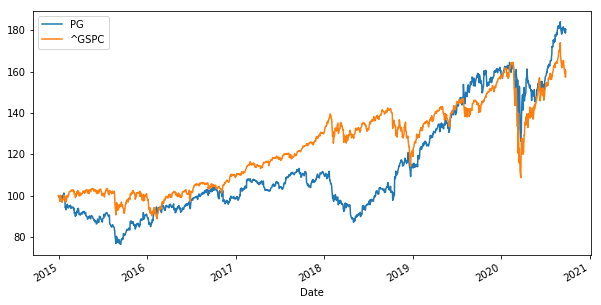

In [3]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [4]:
log_returns = np.log(pf_data / pf_data.shift(1))

print(log_returns.mean()* 250) # yearly mean
print(log_returns.cov() * 250)
print(log_returns.corr())

PG       0.102004
^GSPC    0.081593
dtype: float64
             PG     ^GSPC
PG     0.038093  0.022769
^GSPC  0.022769  0.035267
             PG     ^GSPC
PG     1.000000  0.621212
^GSPC  0.621212  1.000000


In [5]:
num_assets = len(assets)
weights = np.random.random(num_assets)  # create random weights - will sum up to 1
weights /= np.sum(weights)   # remember, here is the trick : w = w / sum(w)
weights

array([0.3219003, 0.6780997])

In [6]:
weights[0] + weights[1] == 1

False

In [7]:
np.sum(weights * log_returns.mean()) * 250

0.08816370801156806

In [8]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.030104017286603432

In [9]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.030104017286603432

In [10]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)  # create random weights - will sum up to 1
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

# before plotting, we need to convert the values into array
pfolio_returns = np.array(pfolio_returns) 
pfolio_volatilities = np.array(pfolio_volatilities)

In [11]:
portfolios = pd.DataFrame({'Return' : pfolio_returns, 'Volatility' : pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.096218,0.177878
1,0.092182,0.172591
2,0.092536,0.172810
3,0.084321,0.180065
4,0.089619,0.172454


Text(0.5,1,'Efficient Frontier')

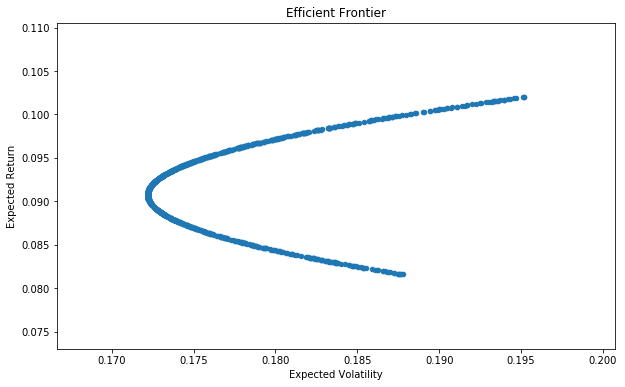

In [12]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')